In [3]:
from sklearn.datasets import load_iris
from scipy.stats import entropy
import pandas as pd
import numpy as np
import sklearn.preprocessing as preprocessing
import sklearn.model_selection as model_selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the Iris dataset
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['target'] = iris.target
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [6]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [7]:
data.target.value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

In [8]:
# Select a subset for binary classification (setosa vs non-setosa)
data = data[data['target'] < 2]
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1


In [9]:
# Function to calculate entropy of a dataset
def calculate_entropy(y):
    counts = np.bincount(y)
    probabilities = counts / len(y)
    return entropy(probabilities, base=2)

In [10]:
# Function to calculate information gain
def information_gain(data, split_feature, target_col='target'):
    total_entropy = calculate_entropy(data[target_col])
    values, counts = np.unique(data[split_feature], return_counts=True)
    weighted_entropy = sum(
        (counts[i] / len(data)) * calculate_entropy(data[data[split_feature] == values[i]][target_col]) for i in range(len(values))
    )
    return total_entropy - weighted_entropy


In [11]:
# Calculate information gain for each feature
info_gains = {feature: information_gain(data, feature) for feature in iris.feature_names[:5]}

In [12]:
print("Information Gain for each feature:")
print(info_gains)

Information Gain for each feature:
{'sepal length (cm)': np.float64(0.6216770607821273), 'sepal width (cm)': np.float64(0.5663626563839141), 'petal length (cm)': np.float64(1.0), 'petal width (cm)': np.float64(1.0)}


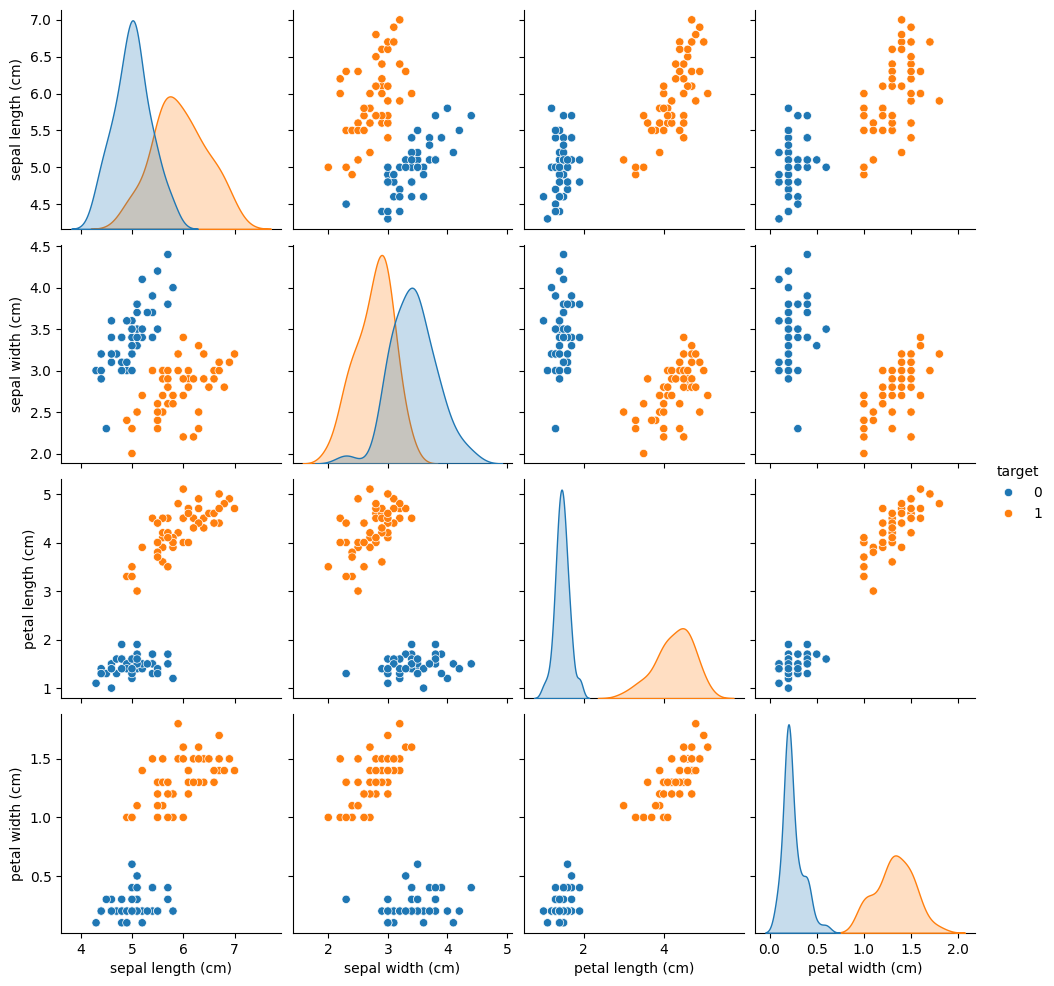

In [13]:
sns.pairplot(data, hue='target')

In [14]:
corr_matrix = data.corr()
print(corr_matrix)

                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.205926           0.812458   
sepal width (cm)           -0.205926          1.000000          -0.602663   
petal length (cm)           0.812458         -0.602663           1.000000   
petal width (cm)            0.789608         -0.570883           0.979322   
target                      0.728290         -0.690684           0.969990   

                   petal width (cm)    target  
sepal length (cm)          0.789608  0.728290  
sepal width (cm)          -0.570883 -0.690684  
petal length (cm)          0.979322  0.969990  
petal width (cm)           1.000000  0.960307  
target                     0.960307  1.000000  


In [15]:
# Split the data into training and test sets of Selected features
selected_features = ['petal length (cm)', 'petal width (cm)']
X = data[selected_features]
y = data['target']
print(X, y)

    petal length (cm)  petal width (cm)
0                 1.4               0.2
1                 1.4               0.2
2                 1.3               0.2
3                 1.5               0.2
4                 1.4               0.2
..                ...               ...
95                4.2               1.2
96                4.2               1.3
97                4.3               1.3
98                3.0               1.1
99                4.1               1.3

[100 rows x 2 columns] 0     0
1     0
2     0
3     0
4     0
     ..
95    1
96    1
97    1
98    1
99    1
Name: target, Length: 100, dtype: int64


In [16]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=42)
print("Shape of the X-train dataset:", X_train.shape)
print("Shape of the y-train dataset:", y_train.shape)
print("shape of the X-test dataset:", X_test.shape)
print("shape of the y-test dataset:", y_test.shape)

Shape of the X-train dataset: (80, 2)
Shape of the y-train dataset: (80,)
shape of the X-test dataset: (20, 2)
shape of the y-test dataset: (20,)


In [17]:
# stats of the training dataset
print(X_train.describe())

       petal length (cm)  petal width (cm)
count          80.000000         80.000000
mean            2.897500          0.805000
std             1.420107          0.555046
min             1.100000          0.100000
25%             1.500000          0.200000
50%             3.300000          1.000000
75%             4.300000          1.300000
max             4.900000          1.600000


In [18]:
# Standardizing the data
scaler = preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

print(X_scaled)

[[ 1.13555602  0.89744481]
 [ 0.8521099   0.89744481]
 [-0.91942835 -0.73427302]
 [-1.13201294 -1.09687699]
 [ 0.71038684  0.53484084]
 [-0.99028988 -0.73427302]
 [-1.13201294 -0.91557501]
 [ 0.92297143  0.89744481]
 [-0.99028988 -1.27817897]
 [ 1.41900214  1.26004877]
 [-0.91942835 -1.09687699]
 [-1.06115141 -1.09687699]
 [ 1.13555602  1.44135075]
 [-1.06115141 -1.09687699]
 [ 0.28521766  0.35353886]
 [-0.84856682 -0.73427302]
 [ 1.13555602  1.26004877]
 [ 1.06469449  1.07874679]
 [-1.20287447 -1.09687699]
 [-1.13201294 -0.73427302]
 [-1.06115141 -1.09687699]
 [-0.99028988 -1.09687699]
 [-0.99028988 -1.09687699]
 [ 0.92297143  0.71614283]
 [-0.99028988 -1.09687699]
 [-0.99028988 -0.91557501]
 [ 0.56866378  0.35353886]
 [-0.91942835 -1.09687699]
 [ 0.78124837  0.35353886]
 [-1.273736   -1.27817897]
 [-0.70684376 -1.09687699]
 [-0.99028988 -1.09687699]
 [-1.06115141 -0.91557501]
 [-1.13201294 -1.09687699]
 [-1.06115141 -1.09687699]
 [ 1.13555602  1.26004877]
 [-1.06115141 -0.91557501]
 

In [19]:
results = []

model_names = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting']
models = [
    LinearRegression(), 
    DecisionTreeClassifier(random_state=42), 
    RandomForestClassifier(random_state=42), 
    GradientBoostingClassifier(random_state=42)
]

In [22]:
# Train and evaluate each model
for name, model in zip(model_names, models):
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # For Linear Regression, convert continuous predictions to class labels
    if name == 'Linear Regression':
        y_pred = y_pred.round().astype(int)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Store the accuracy and classification report
    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Classification Report": classification_report(y_test, y_pred)
    })


In [24]:
# Display the results
for res in results:
    print(f"\nModel: {res['Model']}")
    print(f"Accuracy: {res['Accuracy']:.2f}")
    print("Classification Report:")
    print(res["Classification Report"])


Model: Linear Regression
Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20


Model: Decision Tree
Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20


Model: Random Forest
Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         8